In [21]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [22]:
class BatsmanS(TypedDict):
    run: int
    ball: int
    four: int
    six: int

    sr: float
    bpb: float
    boundary_percent: float
    summary: str

In [23]:
def calclulate_strike_rate(state: BatsmanS) -> BatsmanS:
    sr = (state['run']/state['ball'])/100
    state['sr'] = sr
    return state

In [24]:
def calclulate_strike_bpb(state: BatsmanS) -> BatsmanS:
    bpb = state['ball']/(state['four'] + state['six'])
    state['bpb'] = bpb
    return state

In [25]:
def calclulate_boundary_percentage(state: BatsmanS) -> BatsmanS:
    boundary_percent = (((state['four'] * 4) + (state['six'] * 6))/state['run'])*100
    state['boundary_percent'] = boundary_percent
    return state

In [26]:
def Summary(state: BatsmanS) -> BatsmanS:
    summary = f"""
        Strike Rate - {state['sr']} \n
        Balls per boundary - {state['bpb']} \n
        boundary_percent - {state['boundary_percent']} \n
    """

    state['summary'] = summary
    return state

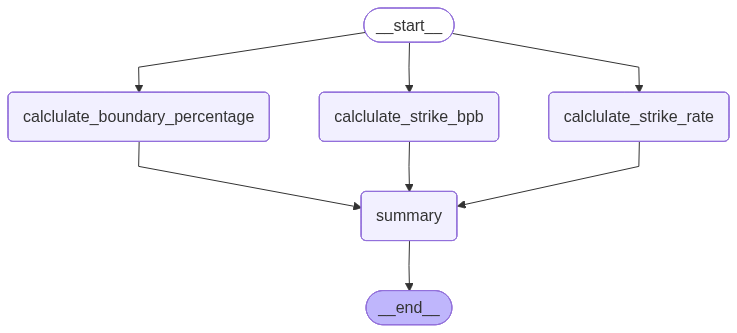

In [31]:
graph = StateGraph(BatsmanS)

graph.add_node('calclulate_strike_rate', calclulate_strike_rate)
graph.add_node('calclulate_strike_bpb', calclulate_strike_bpb)
graph.add_node('calclulate_boundary_percentage', calclulate_boundary_percentage)
graph.add_node('summary', Summary)

graph.add_edge(START, 'calclulate_strike_rate')
graph.add_edge(START, 'calclulate_strike_bpb')
graph.add_edge(START, 'calclulate_boundary_percentage')

graph.add_edge('calclulate_strike_rate','summary')
graph.add_edge('calclulate_strike_bpb','summary')
graph.add_edge('calclulate_boundary_percentage','summary')

graph.add_edge('summary', END)

workflows = graph.compile()
workflows

In [33]:
initial_state = {
    'run': 100,
    'ball': 50,
    'four': 6,
    'six': 4
}

workflows.invoke(initial_state)

InvalidUpdateError: At key 'run': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://docs.langchain.com/oss/python/langgraph/errors/INVALID_CONCURRENT_GRAPH_UPDATE